# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
df.columns = df.columns.str.replace("[-]", "_")
df.columns = df.columns.str.replace("'","")
df.columns = df.columns.str.replace(u"\u2122","")
df.columns = df.columns.str.replace(u"\u00ae","")
df.columns = df.columns.str.replace("½","_and_a_half")
df.columns = df.columns.str.replace("[+]", "_and_above")
df.columns = df.columns.str.replace("[.]", "")
df.columns = df.columns.str.replace(" ", "_")

In [4]:
y = df.list_price
X = df.drop(['list_price'], axis=1)

In [5]:
x_col = list(df.columns.drop(['list_price']))
outcome = 'list_price'

In [6]:
train, test = train_test_split(df)

In [7]:
predictors = '+'.join(x_col)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     570.9
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:53:15   Log-Likelihood:                -40566.
No. Observations:                8152   AIC:                         8.132e+04
Df Residuals:                    8057   BIC:                         8.199e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.5833      1.901     34.501      0.000      61.857      69.310
piece_count                                         72.4270      0.898     80.682      0.000      70.667      74.187
num_reviews                                          6.8886      0.670     10.286      0.000       5.576       8.201
play_star_rating                                     5.0984      0.628      8.117      0.000       3.867       6.330
star_rating                                         -1.9611      0.724     -2.708      0.007      -3.380      -0.542
val_star_rating                                     -8.7898      0.639    -13.748      0.000     -10.043      -7.536
ages_10_and_above                                  117.8596      6.656     17.707      0.000     104.812     130.907
ages_10_14                                         -26.3935      9.014     -2.928      0.003     -44.064      -8.723
ages_10_16                                         -13.2652      4.167     -3.184      0.001     -21.433      -5.097
ages_10_21                                          57.3088      7.369      7.778      0.000      42.865      71.753
ages_11_16                                          -7.5125      6.035     -1.245      0.213     -19.342       4.317
ages_12_and_above                                   73.7785      5.558     13.274      0.000      62.883      84.674
ages_12_16                                         -49.0023      6.895     -7.106      0.000     -62.519     -35.485
ages_14_and_above                                   26.1211      4.205      6.212      0.000      17.878      34.364
ages_16_and_above                                   45.4838      6.018      7.558      0.000      33.687      57.281
ages_1_and_a_half_3                                -10.2672      2.423     -4.238      0.000     -15.016      -5.518
ages_1_and_a_half_5                                 -4.2199      3.038     -1.389      0.165     -10.176       1.736
ages_2_5                                            14.4717      1.708      8.475      0.000      11.124      17.819
ages_4_and_above                                   -20.3082      6.167     -3.293      0.001     -32.398      -8.218
ages_4_7                                            -6.4356      3.365     -1.913      0.056     -13.032       0.161
ages_4_99                                           -2.7656      3.541     -0.781      0.435      -9.707       4.176
ages_5_and_above                                   -10.3540      3.221     -3.215      0.001     -16.668      -4.040
ages_5_12                                          -37.1584      3.287    -11.304      0.000     -43.602     -30.715
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [8]:
model.pvalues[4]

0.006774739628246469

In [9]:
len(x_col)

102

In [10]:
list(model.params.index[:])

['Intercept',
 'piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10_and_above',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12_and_above',
 'ages_12_16',
 'ages_14_and_above',
 'ages_16_and_above',
 'ages_1_and_a_half_3',
 'ages_1_and_a_half_5',
 'ages_2_5',
 'ages_4_and_above',
 'ages_4_7',
 'ages_4_99',
 'ages_5_and_above',
 'ages_5_12',
 'ages_5_8',
 'ages_6_and_above',
 'ages_6_12',
 'ages_6_14',
 'ages_7_and_above',
 'ages_7_12',
 'ages_7_14',
 'ages_8_and_above',
 'ages_8_12',
 'ages_8_14',
 'ages_9_and_above',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'th

In [11]:
features = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features.append(model.params.index[i])
    
len(features)

73

In [12]:
predictors = '+'.join(features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     745.3
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:53:22   Log-Likelihood:                -40576.
No. Observations:                8152   AIC:                         8.130e+04
Df Residuals:                    8079   BIC:                         8.181e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.2368      1.578     39.435      0.000      59.143      65.330
piece_count                                         72.4796      0.826     87.798      0.000      70.861      74.098
num_reviews                                          6.9917      0.660     10.586      0.000       5.697       8.286
play_star_rating                                     5.2461      0.615      8.529      0.000       4.040       6.452
star_rating                                         -1.8538      0.709     -2.615      0.009      -3.244      -0.464
val_star_rating                                     -8.7887      0.613    -14.327      0.000      -9.991      -7.586
ages_10_and_above                                  126.7072      7.575     16.728      0.000     111.859     141.556
ages_10_14                                         -19.0572      9.318     -2.045      0.041     -37.324      -0.791
ages_10_16                                          -6.6155      3.852     -1.717      0.086     -14.167       0.936
ages_10_21                                          66.3715      8.149      8.145      0.000      50.398      82.345
ages_12_and_above                                   81.3226      6.448     12.612      0.000      68.683      93.962
ages_12_16                                         -42.0962      7.071     -5.954      0.000     -55.956     -28.236
ages_14_and_above                                   33.3278      4.640      7.182      0.000      24.231      42.424
ages_16_and_above                                   51.9968      6.377      8.153      0.000      39.496      64.498
ages_1_and_a_half_3                                 -3.3020      3.125     -1.056      0.291      -9.429       2.825
ages_2_5                                            21.0456      2.035     10.340      0.000      17.056      25.036
ages_4_and_above                                   -19.2796      9.431     -2.044      0.041     -37.767      -0.792
ages_5_and_above                                    -8.0554      3.156     -2.553      0.011     -14.241      -1.870
ages_5_12                                          -29.5642      2.782    -10.628      0.000     -35.017     -24.111
ages_6_and_above                                   -19.5635      5.513     -3.548      0.000     -30.371      -8.756
ages_6_12                                          -15.5332      1.929     -8.053      0.000     -19.314     -11.752
ages_6_14                                           -1.0172      4.111     -0.247      0.805      -9.075       7.041
ages_7_12                                          -14.4892      2.255     -6.425      0.000     -18.910     -10.068
ages_7_14                                

In [13]:
features2 = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features2.append(model.params.index[i])
    
display(len(features2))

predictors = '+'.join(features2)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

66

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     824.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:53:22   Log-Likelihood:                -40582.
No. Observations:                8152   AIC:                         8.130e+04
Df Residuals:                    8086   BIC:                         8.176e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           61.3746      1.260     48.725      0.000      58.905      63.844
piece_count                                         72.3461      0.803     90.087      0.000      70.772      73.920
num_reviews                                          6.9567      0.659     10.552      0.000       5.664       8.249
play_star_rating                                     5.2820      0.609      8.679      0.000       4.089       6.475
star_rating                                         -1.8149      0.704     -2.577      0.010      -3.195      -0.434
val_star_rating                                     -8.8859      0.606    -14.658      0.000     -10.074      -7.698
ages_10_and_above                                  129.2210      7.337     17.612      0.000     114.838     143.604
ages_10_14                                         -15.5774      9.140     -1.704      0.088     -33.493       2.339
ages_10_21                                          68.3175      7.934      8.611      0.000      52.765      83.870
ages_12_and_above                                   84.3009      6.127     13.760      0.000      72.291      96.311
ages_12_16                                         -37.6501      6.803     -5.534      0.000     -50.986     -24.315
ages_14_and_above                                   37.2893      4.182      8.917      0.000      29.091      45.487
ages_16_and_above                                   55.7565      5.947      9.375      0.000      44.099      67.414
ages_2_5                                            22.2747      1.834     12.145      0.000      18.680      25.870
ages_4_and_above                                   -19.1522      9.431     -2.031      0.042     -37.640      -0.664
ages_5_and_above                                    -7.4645      3.126     -2.388      0.017     -13.592      -1.337
ages_5_12                                          -27.6017      2.586    -10.674      0.000     -32.670     -22.533
ages_6_and_above                                   -17.8057      5.423     -3.283      0.001     -28.437      -7.174
ages_6_12                                          -13.2738      1.573     -8.438      0.000     -16.357     -10.190
ages_7_12                                          -12.6716      1.982     -6.394      0.000     -16.557      -8.787
ages_7_14                                           -8.5469      1.695     -5.043      0.000     -11.869      -5.225
ages_8_and_above                                    21.8497      4.851      4.505      0.000      12.341      31.358
ages_8_12                                          -12.6827      2.545     -4.983      0.000     -17.672      -7.694
ages_8_14                                

In [14]:
features3 = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features3.append(model.params.index[i])
    
display(len(features3))

predictors = '+'.join(features3)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

63

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     863.9
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:53:23   Log-Likelihood:                -40587.
No. Observations:                8152   AIC:                         8.130e+04
Df Residuals:                    8089   BIC:                         8.174e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.1551      1.218     51.017      0.000      59.767      64.543
piece_count                                         72.4387      0.801     90.464      0.000      70.869      74.008
num_reviews                                          7.0115      0.659     10.643      0.000       5.720       8.303
play_star_rating                                     5.2960      0.609      8.701      0.000       4.103       6.489
star_rating                                         -1.8187      0.704     -2.582      0.010      -3.200      -0.438
val_star_rating                                     -8.9141      0.606    -14.704      0.000     -10.102      -7.726
ages_10_and_above                                  129.6852      7.336     17.677      0.000     115.304     144.067
ages_10_21                                          68.4354      7.936      8.623      0.000      52.878      83.993
ages_12_and_above                                   84.5833      6.128     13.803      0.000      72.571      96.595
ages_12_16                                         -37.4608      6.805     -5.505      0.000     -50.801     -24.121
ages_14_and_above                                   37.6236      4.179      9.004      0.000      29.432      45.815
ages_16_and_above                                   55.9477      5.948      9.405      0.000      44.287      67.608
ages_2_5                                            22.3700      1.834     12.200      0.000      18.776      25.964
ages_4_and_above                                   -19.3000      9.434     -2.046      0.041     -37.793      -0.807
ages_5_and_above                                    -7.4886      3.127     -2.395      0.017     -13.618      -1.359
ages_5_12                                          -27.4344      2.584    -10.615      0.000     -32.501     -22.368
ages_6_and_above                                   -17.5868      5.424     -3.242      0.001     -28.220      -6.954
ages_6_12                                          -13.0427      1.569     -8.315      0.000     -16.118      -9.968
ages_7_12                                          -12.4694      1.979     -6.302      0.000     -16.348      -8.590
ages_7_14                                           -8.4217      1.694     -4.972      0.000     -11.742      -5.102
ages_8_and_above                                    21.9218      4.852      4.518      0.000      12.411      31.433
ages_8_12                                          -12.5683      2.545     -4.939      0.000     -17.556      -7.580
ages_8_14                                           -7.0521      1.636     -4.311      0.000     -10.259      -3.845
ages_9_and_above                         

In [15]:
features4 = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features4.append(model.params.index[i])
    
display(len(features4))

predictors = '+'.join(features4)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

60

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     907.1
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:53:26   Log-Likelihood:                -40591.
No. Observations:                8152   AIC:                         8.130e+04
Df Residuals:                    8092   BIC:                         8.172e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.0412      1.179     53.451      0.000      60.729      65.353
piece_count                                         72.4213      0.801     90.415      0.000      70.851      73.991
num_reviews                                          7.0106      0.659     10.639      0.000       5.719       8.302
play_star_rating                                     5.2971      0.609      8.700      0.000       4.104       6.491
star_rating                                         -1.8163      0.705     -2.577      0.010      -3.198      -0.435
val_star_rating                                     -8.9129      0.606    -14.697      0.000     -10.102      -7.724
ages_10_and_above                                  129.9030      7.338     17.703      0.000     115.519     144.287
ages_10_21                                          68.6748      7.938      8.651      0.000      53.114      84.235
ages_12_and_above                                   84.6222      6.130     13.805      0.000      72.607      96.638
ages_12_16                                         -37.6204      6.807     -5.527      0.000     -50.964     -24.277
ages_14_and_above                                   37.6744      4.180      9.013      0.000      29.480      45.868
ages_16_and_above                                   56.0027      5.950      9.412      0.000      44.339      67.667
ages_2_5                                            22.3726      1.834     12.198      0.000      18.777      25.968
ages_4_and_above                                   -19.6198      9.436     -2.079      0.038     -38.117      -1.123
ages_5_and_above                                    -7.4806      3.128     -2.392      0.017     -13.612      -1.349
ages_5_12                                          -27.4333      2.585    -10.612      0.000     -32.501     -22.366
ages_6_and_above                                   -17.6368      5.426     -3.251      0.001     -28.273      -7.001
ages_6_12                                          -13.0646      1.569     -8.326      0.000     -16.140      -9.989
ages_7_12                                          -12.4949      1.979     -6.312      0.000     -16.375      -8.615
ages_7_14                                           -8.4034      1.694     -4.960      0.000     -11.724      -5.082
ages_8_and_above                                    21.8937      4.853      4.511      0.000      12.380      31.407
ages_8_12                                          -12.5258      2.545     -4.921      0.000     -17.515      -7.536
ages_8_14                                           -7.0588      1.636     -4.313      0.000     -10.267      -3.851
ages_9_and_above                         

In [16]:
features5 = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features5.append(model.params.index[i])
    
display(len(features5))

predictors = '+'.join(features5)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

57

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     955.1
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:54:04   Log-Likelihood:                -40594.
No. Observations:                8152   AIC:                         8.130e+04
Df Residuals:                    8095   BIC:                         8.170e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6607      1.157     55.013      0.000      61.392      65.929
piece_count                                         72.4029      0.801     90.374      0.000      70.832      73.973
num_reviews                                          7.0060      0.659     10.630      0.000       5.714       8.298
play_star_rating                                     5.2713      0.609      8.657      0.000       4.078       6.465
star_rating                                         -1.7870      0.705     -2.536      0.011      -3.169      -0.405
val_star_rating                                     -8.9356      0.607    -14.733      0.000     -10.125      -7.747
ages_10_and_above                                  129.9185      7.339     17.702      0.000     115.532     144.305
ages_10_21                                          68.7678      7.940      8.661      0.000      53.204      84.332
ages_12_and_above                                   84.6625      6.131     13.809      0.000      72.644      96.681
ages_12_16                                         -37.3940      6.808     -5.492      0.000     -50.740     -24.048
ages_14_and_above                                   37.7358      4.181      9.026      0.000      29.540      45.932
ages_16_and_above                                   56.1550      5.951      9.436      0.000      44.489      67.821
ages_2_5                                            22.3722      1.835     12.195      0.000      18.776      25.968
ages_4_and_above                                   -19.5631      9.439     -2.073      0.038     -38.065      -1.061
ages_5_and_above                                    -7.4777      3.129     -2.390      0.017     -13.611      -1.345
ages_5_12                                          -27.4811      2.586    -10.628      0.000     -32.550     -22.412
ages_6_and_above                                   -17.5902      5.427     -3.241      0.001     -28.229      -6.952
ages_6_12                                          -13.0482      1.569     -8.314      0.000     -16.125      -9.972
ages_7_12                                          -12.4844      1.980     -6.305      0.000     -16.366      -8.603
ages_7_14                                           -8.3828      1.695     -4.947      0.000     -11.705      -5.061
ages_8_and_above                                    21.8129      4.854      4.494      0.000      12.297      31.328
ages_8_12                                          -12.5569      2.546     -4.932      0.000     -17.547      -7.566
ages_8_14                                           -7.0635      1.637     -4.315      0.000     -10.272      -3.855
ages_9_and_above                         

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [17]:
#Your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[features5]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_features5 = list(zip(features5, vif))

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [19]:
vif_features5

[('piece_count', 4.08129580149648),
 ('num_reviews', 2.9073892488951047),
 ('play_star_rating', 2.4214200445688285),
 ('star_rating', 3.1707838792464464),
 ('val_star_rating', 2.39399524864494),
 ('ages_10_and_above', 17.63412633834175),
 ('ages_10_21', 7.166710960322042),
 ('ages_12_and_above', 6.865558436482757),
 ('ages_12_16', 1.1242156117427653),
 ('ages_14_and_above', 1.9472592017709174),
 ('ages_16_and_above', 8.434987319202925),
 ('ages_2_5', 1.1638960605928599),
 ('ages_4_and_above', 1.204241818146043),
 ('ages_5_and_above', inf),
 ('ages_5_12', 3.1411670205720035),
 ('ages_6_and_above', 2.6559078038278763),
 ('ages_6_12', 1.6842428617615302),
 ('ages_7_12', 1.3917045575246483),
 ('ages_7_14', 1.6389716660385583),
 ('ages_8_and_above', 3.3230033428010644),
 ('ages_8_12', 1.2048156595881967),
 ('ages_8_14', 1.4843070001542453),
 ('ages_9_and_above', 1.5540600950454528),
 ('ages_9_12', 1.0155686563954052),
 ('theme_name_Architecture', 5.845593752702104),
 ('theme_name_BOOST', 1.

In [20]:
new_features = [x for x,vif in vif_features5 if vif < 5]
len(new_features)

48

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [21]:
predictors = '+'.join(new_features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     987.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:58:25   Log-Likelihood:                -41021.
No. Observations:                8152   AIC:                         8.214e+04
Df Residuals:                    8103   BIC:                         8.248e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           69.7291      1.017     68.553      0.000      67.735      71.723
piece_count                                         75.2406      0.670    112.290      0.000      73.927      76.554
num_reviews                                          6.7844      0.637     10.655      0.000       5.536       8.033
play_star_rating                                     7.1937      0.555     12.962      0.000       6.106       8.282
star_rating                                         -2.5482      0.714     -3.568      0.000      -3.948      -1.148
val_star_rating                                    -10.2108      0.629    -16.230      0.000     -11.444      -8.978
ages_12_16                                         -52.2027      6.930     -7.533      0.000     -65.787     -38.619
ages_14_and_above                                   13.8666      3.840      3.611      0.000       6.339      21.394
ages_2_5                                            17.9684      1.815      9.902      0.000      14.411      21.526
ages_4_and_above                                   -15.7369      9.858     -1.596      0.110     -35.060       3.586
ages_5_12                                          -33.2214      2.659    -12.494      0.000     -38.434     -28.009
ages_6_and_above                                   -24.3432      5.678     -4.287      0.000     -35.473     -13.213
ages_6_12                                          -19.1028      1.562    -12.234      0.000     -22.164     -16.042
ages_7_12                                          -17.6112      2.022     -8.708      0.000     -21.576     -13.647
ages_7_14                                          -13.9048      1.703     -8.164      0.000     -17.244     -10.566
ages_8_and_above                                     0.6166      4.419      0.140      0.889      -8.047       9.280
ages_8_12                                          -17.4462      2.603     -6.701      0.000     -22.550     -12.343
ages_8_14                                          -12.5680      1.662     -7.563      0.000     -15.826      -9.310
ages_9_and_above                                    16.1647      9.876      1.637      0.102      -3.194      35.523
ages_9_12                                          -29.4940      6.884     -4.284      0.000     -42.988     -16.000
theme_name_BOOST                                    81.9315     10.241      8.001      0.000      61.857     102.006
theme_name_Blues_Helicopter_Pursuit                 21.9676      9.787      2.245      0.025       2.783      41.152
theme_name_Carnotaurus_Gyrosphere_Escape            49.4010      9.001      5.488      0.000      31.756      67.046
theme_name_City                          

In [22]:
new_features1 = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            new_features1.append(model.params.index[i])
    
display(len(new_features1))

predictors = '+'.join(new_features1)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

43

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1101.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:59:16   Log-Likelihood:                -41029.
No. Observations:                8152   AIC:                         8.215e+04
Df Residuals:                    8108   BIC:                         8.245e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           69.1655      0.982     70.449      0.000      67.241      71.090
piece_count                                         75.3660      0.667    113.032      0.000      74.059      76.673
num_reviews                                          6.4296      0.600     10.712      0.000       5.253       7.606
play_star_rating                                     7.1374      0.550     12.983      0.000       6.060       8.215
star_rating                                         -2.6490      0.711     -3.724      0.000      -4.044      -1.255
val_star_rating                                    -10.2167      0.629    -16.255      0.000     -11.449      -8.985
ages_12_16                                         -51.7328      6.929     -7.466      0.000     -65.316     -38.150
ages_14_and_above                                   14.7176      3.828      3.844      0.000       7.213      22.222
ages_2_5                                            18.5471      1.794     10.338      0.000      15.030      22.064
ages_5_12                                          -32.3800      2.637    -12.277      0.000     -37.550     -27.210
ages_6_and_above                                   -23.6408      5.676     -4.165      0.000     -34.767     -12.515
ages_6_12                                          -18.2021      1.523    -11.948      0.000     -21.188     -15.216
ages_7_12                                          -17.0619      2.007     -8.499      0.000     -20.997     -13.127
ages_7_14                                          -13.3816      1.671     -8.010      0.000     -16.657     -10.107
ages_8_12                                          -16.9914      2.593     -6.552      0.000     -22.075     -11.908
ages_8_14                                          -12.0829      1.649     -7.328      0.000     -15.315      -8.851
ages_9_12                                          -29.0135      6.881     -4.217      0.000     -42.501     -15.526
theme_name_BOOST                                    82.0948     10.245      8.013      0.000      62.012     102.178
theme_name_Blues_Helicopter_Pursuit                 21.9214      9.794      2.238      0.025       2.723      41.120
theme_name_Carnotaurus_Gyrosphere_Escape            49.3630      9.008      5.480      0.000      31.706      67.020
theme_name_City                                     20.4872      2.284      8.971      0.000      16.011      24.964
theme_name_Classic                                 -23.3472      2.501     -9.334      0.000     -28.250     -18.444
theme_name_Creator_Expert                          -85.6389      3.261    -26.264      0.000     -92.031     -79.247
theme_name_DIMENSIONS                    

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [23]:
import statsmodels.api as sm
import scipy.stats as stats

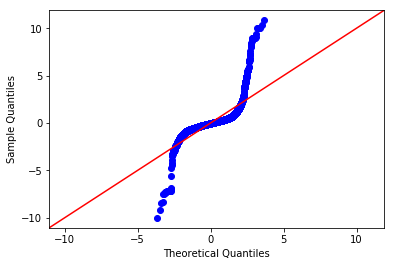

In [24]:
# Your code here
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

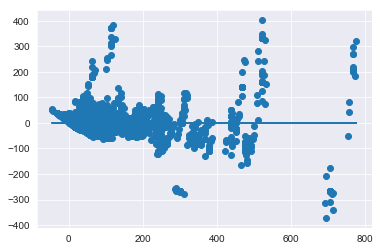

In [28]:
plt.scatter(model.predict(train[new_features1]), model.resid)
plt.plot(model.predict(train[new_features1]), [0 for i in range(len(train))]);

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [ ]:
#Your code here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 